In [54]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/LENOVO/Downloads/Case Study 3  Sales Prediction.xlsx"
df = pd.read_excel(file_path, sheet_name='Data')

In [55]:
# Convert 'Date' column
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [56]:
# Show first few rows
print("Sample Data:")
display(df.head())


Sample Data:


,Date,Region,Cluster,Country,Segment,Sales Amount
0,2023-01-02,INTERNATIONAL,SOEUR,Italy,Other Reconstruction,-1.963788
1,2023-01-02,INTERNATIONAL,SOEUR,Spain,Other Reconstruction,2.418589
2,2023-01-02,INTERNATIONAL,UKINORD,Denmark,HIPS,2.582195
3,2023-01-02,INTERNATIONAL,CEUR,Germany,Other Reconstruction,2.814559
4,2023-01-02,INTERNATIONAL,FRABENE,Netherlands,HIPS,2.907201


In [57]:
# Basic info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30981 entries, 0 to 30980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          30981 non-null  datetime64[ns]
 1   Region        30981 non-null  object        
 2   Cluster       30981 non-null  object        
 3   Country       30981 non-null  object        
 4   Segment       30981 non-null  object        
 5   Sales Amount  29708 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.4+ MB


In [58]:
# Descriptive statistics (numeric + categorical)
print("\nDescriptive Statistics:")
display(df.describe(include='all'))



Descriptive Statistics:


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17156\795669357.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include='all'))


,Date,Region,Cluster,Country,Segment,Sales Amount
count,30981,30981,30981,30981,30981,29708.000000
unique,777,1,6,22,4,NaN
top,2023-03-13 00:00:00,INTERNATIONAL,SOEUR,Spain,HIPS,NaN
freq,65,30981,7064,2460,8755,NaN
first,2023-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2025-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.257342
std,NaN,NaN,NaN,NaN,NaN,5.488283
min,NaN,NaN,NaN,NaN,NaN,-11.698970
25%,NaN,NaN,NaN,NaN,NaN,3.332164


In [59]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum()) 


Missing Values:
Date               0
Region             0
Cluster            0
Country            0
Segment            0
Sales Amount    1273
dtype: int64


In [60]:
# Check number of negative sales entries
negative_sales_count = (df['Sales Amount'] < 0).sum()
print(f"\nNumber of rows with negative Sales Amount: {negative_sales_count}")


Number of rows with negative Sales Amount: 23


# Visualization

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set style
sns.set(style="whitegrid")

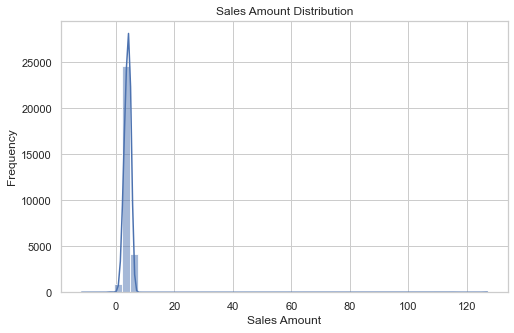

In [62]:
#Distribution of Sales Amount: To visualize the distribution of Sales Amount, including any skewness or outliers.
plt.figure(figsize=(8,5))
sns.histplot(df['Sales Amount'].dropna(), kde=True, bins=50)
plt.title('Sales Amount Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


🧠 Sales Amount Distribution Plot
1. The majority of Sales Amount values are clustered between 0 and 10.(Right Skewed)
2. Sales amounts above 20, especially those exceeding 100, are rare but present.
3. 23 negative values are also visible on the far left.

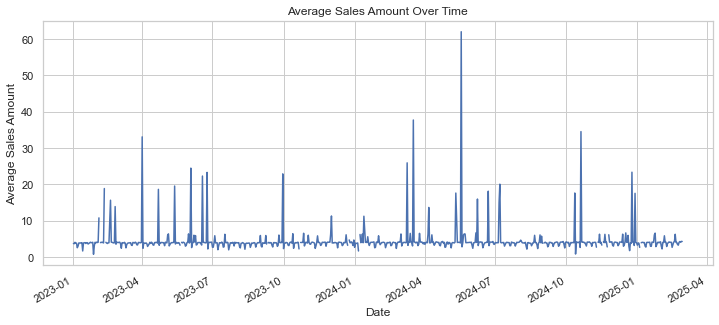

In [63]:
#Sales Over Time: total Sales Amount over time.
sales_by_date = df.groupby('Date')['Sales Amount'].mean()
plt.figure(figsize=(12,5))
sales_by_date.plot()
plt.title('Average Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales Amount')
plt.grid(True)
plt.show()


💡Average Sales Amount Over Time
1. average sales amount per day stays relatively low and consistent
2. There are several noticeable spikes, especially one around mid-2024
3. There’s no repeating pattern across months or quarters

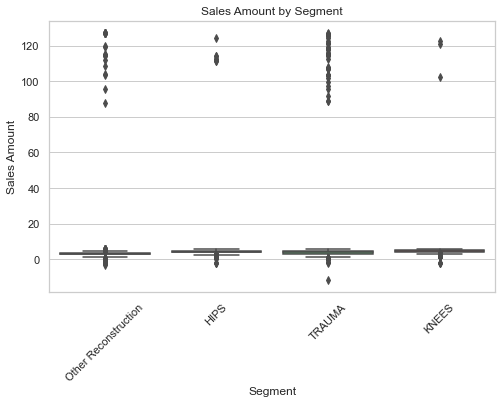

In [64]:
# Sales by Segment
plt.figure(figsize=(8,5))
sns.boxplot(x='Segment', y='Sales Amount', data=df)
plt.title('Sales Amount by Segment')
plt.xticks(rotation=45)
plt.show()


🪄 Sales Amount by Segment 
1. Other Reconstruction: 
  Median sales amount is low.
  Has a few large outliers (sales > 120).

2. HIPS: 
  Similar to “Other Reconstruction” but has slightly fewer extreme outliers.
  Concentration of sales is low, but upper outliers are stable.

3. TRAUMA: 
 Has several outliers, with a wider interquartile range (IQR).
 More variability within normal data compared to other segments.

4. KNEES: 
 Has several outliers but a tighter IQR, similar to HIPS.
 Lower spread in central values, indicating more consistent performance except for outliers.




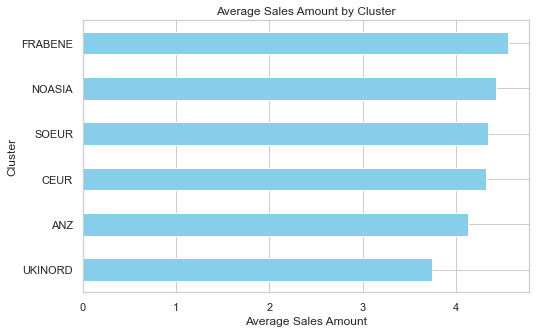

In [65]:
#Sales by Cluster: Average sales amount across clusters.
cluster_sales = df.groupby('Cluster')['Sales Amount'].mean().sort_values()

plt.figure(figsize=(8,5))
cluster_sales.plot(kind='barh', color='skyblue')
plt.title('Average Sales Amount by Cluster')
plt.xlabel('Average Sales Amount')
plt.show()



🌟 Average sales amount across clusters
1. FRABENE has the highest average sales amount.
2. UKINORD shows the lowest average sales.
3. NOASIA, SOEUR, and CEUR have very similar average sales.
4. The overall variation between clusters is modest, but FRABENE stands out and UKINORD may need strategic attention.

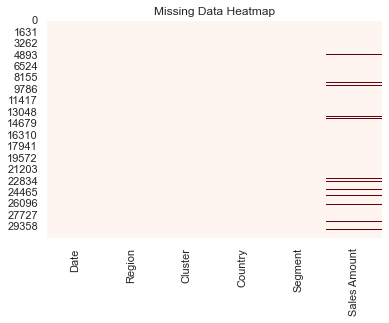

In [66]:
# Heatmap of Missing Values: 
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Data Heatmap')
plt.show()


⚡️Heatmap of Missing Value
1. Only the "Sales Amount" column has missing values; all other columns (Date, Region, Cluster, Country, Segment) are complete.
2. The missing values are distributed across the dataset, not concentrated in one block.
3. Since sales is a critical metric, these missing entries should either be handled.
4. The overall dataset is clean except for the few nulls in "Sales Amount".

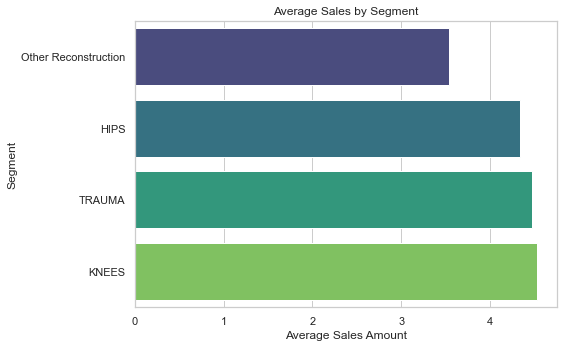

In [67]:
# 1. Average Sales by Segment
avg_sales_by_segment = df.groupby('Segment')['Sales Amount'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_sales_by_segment.values, y=avg_sales_by_segment.index, palette='viridis')
plt.title('Average Sales by Segment')
plt.xlabel('Average Sales Amount')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

📊Average Sales by Segment
1. KNEES and TRAUMA segments show the highest average sales.
2. Other Reconstruction is the lowest performing segment.

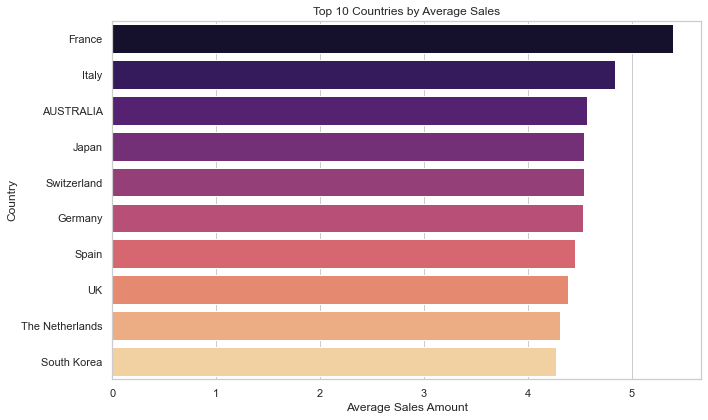

In [68]:
# 2. Top 10 Countries by Average Sales
avg_sales_by_country = df.groupby('Country')['Sales Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_country.values, y=avg_sales_by_country.index, palette='magma')
plt.title('Top 10 Countries by Average Sales')
plt.xlabel('Average Sales Amount')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


🌍 Top 10 Countries by Average Sales
1. France, Italy, and Australia lead in average sales.
2. These countries might be key contributors to overall revenue.


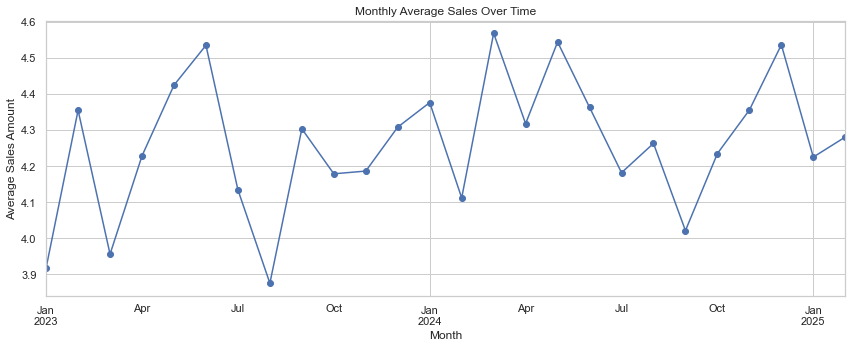

In [69]:
# 3. Monthly Average Sales Over Time
monthly_sales = df.resample('M', on='Date')['Sales Amount'].mean()

plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Average Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

📈 Monthly Average Sales Trend
1. The monthly trend shows seasonal fluctuations in average sales.
2. There's no clear upward or downward trend, but certain months (like mid-2023 and early 2024) saw peaks.

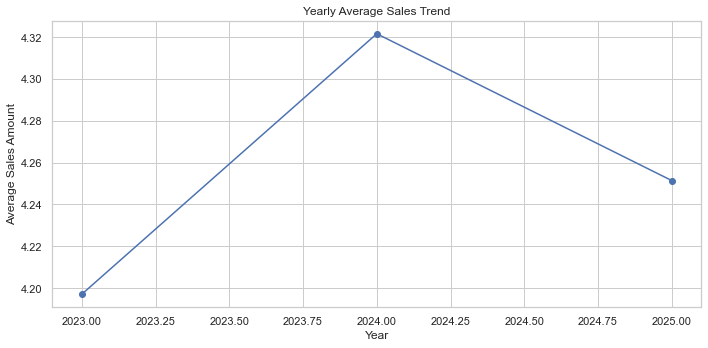

In [70]:
# Create Year and Month columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')

# Yearly sales trend
yearly_sales = df.groupby('Year')['Sales Amount'].mean()

plt.figure(figsize=(10, 5))
yearly_sales.plot(marker='o', linestyle='-')
plt.title('Yearly Average Sales Trend')
plt.xlabel('Year')
plt.ylabel('Average Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

📆Yearly Sales Trend
1. A moderate increase in average sales from 2023 to 2024.
2. Early 2025 shows a slight dip but might be due to incomplete data.

# Handle Values

In [71]:
# Step 3: Data Cleaning

# 1. Convert negative sales to NaN
df.loc[df['Sales Amount'] < 0, 'Sales Amount'] = None

# 2. Fill missing/NaN values with median value per Segment
df['Sales Amount'] = df.groupby('Segment')['Sales Amount'].transform(
    lambda x: x.fillna(x.median())
)

# 3. Confirm no missing values remain
print("Remaining missing values after cleaning:")
print(df['Sales Amount'].isnull().sum())


Remaining missing values after cleaning:
0


# Feature Engineering

In [72]:
# Recreate time-based features if not present
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# 1. Generate average sales and sales ratio per Country
df['Average_Sales_Country'] = df.groupby('Country')['Sales Amount'].transform('mean')
df['Sales_Ratio_Country'] = df['Sales Amount'] / df['Average_Sales_Country']

print("Aggregated sales features by Country added.")
print(df[['Country', 'Sales Amount', 'Average_Sales_Country', 'Sales_Ratio_Country']].head())

# 2. Generate average sales and sales ratio per Segment
df['AvgSales_by_Segment'] = df.groupby('Segment')['Sales Amount'].transform('mean')
df['Sales_Ratio_by_Segment'] = df['Sales Amount'] / df['AvgSales_by_Segment']

print("Aggregated sales features by Segment added.")
print(df[['Segment', 'Sales Amount', 'AvgSales_by_Segment', 'Sales_Ratio_by_Segment']].head())


Aggregated sales features by Country added.
       Country  Sales Amount  Average_Sales_Country  Sales_Ratio_Country
0        Italy      3.104398               4.829814             0.642757
1        Spain      2.418589               4.426733             0.546360
2      Denmark      2.582195               2.947967             0.875924
3      Germany      2.814559               4.489056             0.626982
4  Netherlands      2.907201               3.525702             0.824574
Aggregated sales features by Segment added.
                Segment  Sales Amount  AvgSales_by_Segment  \
0  Other Reconstruction      3.104398             3.525141   
1  Other Reconstruction      2.418589             3.525141   
2                  HIPS      2.582195             4.338201   
3  Other Reconstruction      2.814559             3.525141   
4                  HIPS      2.907201             4.338201   

   Sales_Ratio_by_Segment  
0                0.880645  
1                0.686097  
2                

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [74]:
print(df.columns.tolist())


['Date', 'Region', 'Cluster', 'Country', 'Segment', 'Sales Amount', 'Year', 'Month', 'Quarter', 'DayOfWeek', 'IsWeekend', 'Average_Sales_Country', 'Sales_Ratio_Country', 'AvgSales_by_Segment', 'Sales_Ratio_by_Segment']


In [75]:
features = [
    'Year', 'Month', 'Quarter', 'DayOfWeek', 'IsWeekend',
    'AvgSales_by_Segment', 'Sales_Ratio_by_Segment',
    'Average_Sales_Country', 'Sales_Ratio_Country'
]

X = df[features]
y = df['Sales Amount']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
# print("Missing values in X:")
# print(X.isnull().sum())

# print("\nInfinite values in X:")
# print(np.isinf(X).sum())


Missing values in X:
Year                         0
Month                        0
Quarter                      0
DayOfWeek                    0
IsWeekend                    0
AvgSales_by_Segment          0
Sales_Ratio_by_Segment    1273
Average_Sales_Country        0
Sales_Ratio_Country       1273
dtype: int64

Infinite values in X:
Year                      0
Month                     0
Quarter                   0
DayOfWeek                 0
IsWeekend                 0
AvgSales_by_Segment       0
Sales_Ratio_by_Segment    0
Average_Sales_Country     0
Sales_Ratio_Country       0
dtype: int64


In [46]:
# # Combine X and y into one dataframe temporarily
# combined = pd.concat([X, y], axis=1)

# # Drop rows with NaN or infinite values
# combined = combined.replace([np.inf, -np.inf], np.nan)
# combined = combined.dropna()

# # Split again
# X_clean = combined[features]
# y_clean = combined['Sales Amount']


In [78]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [79]:
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("📊 Linear Regression Results")
print(f"✅ MSE: {mse_lr:.4f}")
print(f"✅ RMSE: {rmse_lr:.4f}")
print(f"✅ R² Score: {r2_lr:.4f}")


📊 Linear Regression Results
✅ MSE: 0.2870
✅ RMSE: 0.5357
✅ R² Score: 0.9931


In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")


✅ Mean Squared Error (MSE): 0.0384
✅ RMSE: 0.1960
✅ R² Score: 0.9989


In [81]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reuse same clean features and target
X = df[features]
y = df['Sales Amount']  # Or 'Log_Sales_Amount' for log target

# Clean up (in case)
combined = pd.concat([X, y], axis=1)
combined = combined.replace([np.inf, -np.inf], np.nan).dropna()
X_clean = combined[features]
y_clean = combined['Sales Amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"🌟 XGBoost Results")
print(f"✅ MSE: {mse_xgb:.4f}")
print(f"✅ RMSE: {rmse_xgb:.4f}")
print(f"✅ R² Score: {r2_xgb:.4f}")


🌟 XGBoost Results
✅ MSE: 0.0857
✅ RMSE: 0.2927
✅ R² Score: 0.9979
